In [1]:
from pandas import DataFrame
import matplotlib.pyplot as plt
import pandas

df: DataFrame = pandas.read_pickle('/mnt/hit4/hit4user/PycharmProjects/mysql_connector/b')
df = df.fillna(0)

df_new = df[df['`condition`'] == 'new']
df_uses = df[df['`condition`'] == 'uses']
print("Количество новых:\t\t", len(df_uses))
print("  отклоненных СПР:", len(df_uses[df_uses['system'] == 0]),
      "\tотклоненных андер-ом:", len(df_uses[df_uses['under'] == 0]),
      "\tпринятых СПР:", len(df_uses[df_uses['system'] == 1]),
      "\tпринятых андер-ом:", len(df_uses[df_uses['under'] == 1]))
print("Количество поддержанных:\t",len(df_new))
print("  отклоненных СПР:", len(df_new[df_new['system'] == 0]),
      "\tотклоненных андер-ом:", len(df_new[df_new['under'] == 0]),
      "\tпринятых СПР:", len(df_new[df_new['system'] == 1]),
      "\tпринятых андер-ом:", len(df_new[df_new['under'] == 1]))
print("")

Количество новых:		 2465
  отклоненных СПР: 1685 	отклоненных андер-ом: 2382 	принятых СПР: 780 	принятых андер-ом: 83
Количество поддержанных:	 8571
  отклоненных СПР: 5158 	отклоненных андер-ом: 8319 	принятых СПР: 3413 	принятых андер-ом: 252



In [101]:
from scipy.stats import pearsonr
a = pearsonr(df['anket_score'], df['system'])
print("Коэффициент корреляции между анкетным скорингом и СПР:", a[0])
a = pearsonr(df_new['anket_score'], df_new['system'])
print("для новые:", a[0])
a = pearsonr(df_uses['anket_score'], df_uses['system'])
print("для поддержанные:", a[0])

a = pearsonr(df['anket_score'], df['under'])
print("Коэффициент корреляции между анкетным скорингом и андерайтором:", a[0])
a = pearsonr(df_new['anket_score'], df_new['under'])
print("для новые:", a[0])
a = pearsonr(df_uses['anket_score'], df_uses['under'])
print("для поддержанные:", a[0])

Коэффициент корреляции между анкетным скорингом и СПР: 0.12284663680913993
для новые: 0.12811781325404806
для поддержанные: 0.057585071364202246
Коэффициент корреляции между анкетным скорингом и андерайтором: -0.012431190608889548
для новые: -0.0038641565443309402
для поддержанные: -0.037553566659980095


# Гистограммы

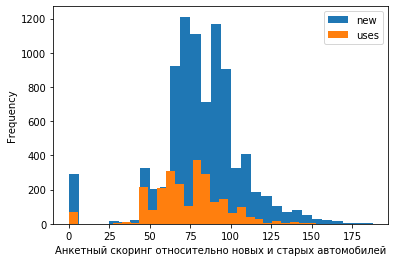

In [102]:
a = df.groupby('`condition`')['anket_score'].plot.hist(bins=30)
plt.legend()
plt.xticks()
plt.xlabel('Анкетный скоринг относительно новых и старых автомобилей')
plt.show()

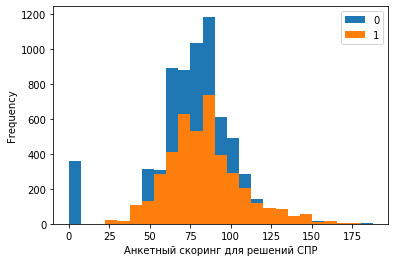

In [103]:
df.groupby('system')['anket_score'].plot.hist(bins=25)
plt.legend()
plt.xticks()
plt.xlabel('Анкетный скоринг для решений СПР')
plt.show()

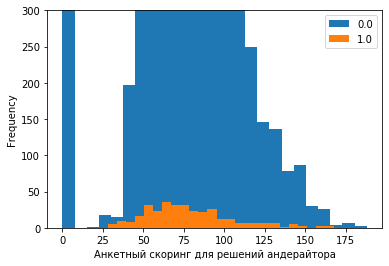

In [104]:
df.groupby('under')['anket_score'].plot.hist(bins=25, ylim=(0,300))
plt.legend()
plt.xticks()
plt.xlabel('Анкетный скоринг для решений андерайтора')
plt.show()

0 - отказано, 1 - принято

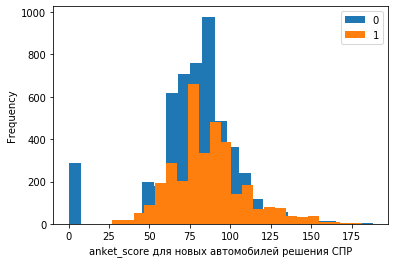

In [105]:
df_new.groupby('system')['anket_score'].plot.hist(bins=25)
plt.legend()
plt.xticks()
plt.xlabel('anket_score для новых автомобилей решения СПР')
plt.show()

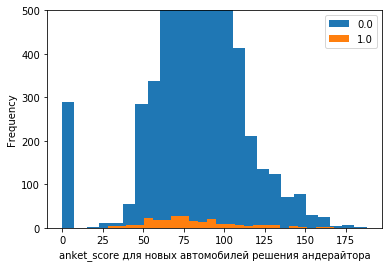

In [106]:
df_new.groupby('under')['anket_score'].plot.hist(bins=25, ylim=(0,500))
plt.legend()
plt.xticks()
plt.xlabel('anket_score для новых автомобилей решения андерайтора')
plt.show()

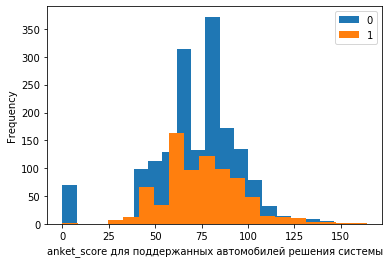

In [107]:
df_uses.groupby('system')['anket_score'].plot.hist(bins=20)
plt.legend()
plt.xticks()
plt.xlabel('anket_score для поддержанных автомобилей решения системы')
plt.show()

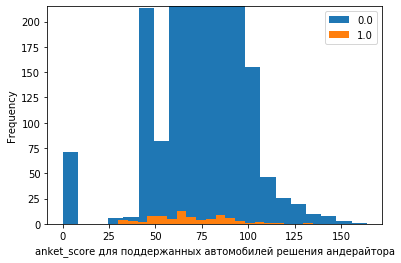

In [108]:
df_uses.groupby('under')['anket_score'].plot.hist(bins=20, ylim=(0,215))
plt.legend()
plt.xticks()
plt.xlabel('anket_score для поддержанных автомобилей решения андерайтора')
plt.show()

# Решения СПР

In [109]:
x = df_uses[(df_uses['anket_score'] != 0) & (df_uses['system'] == 1)]
y = df_uses[(df_uses['anket_score'] != 0) & (df_uses['system'] == 0)]
print("минимальный скоринг при котором заявка принята, отклонена у поддержанных:\n", 
      min(x['anket_score']), min(y['anket_score']))
x = df_new[(df_new['anket_score'] != 0) & (df_new['system'] == 1)]
y = df_new[(df_new['anket_score'] != 0) & (df_new['system'] == 0)]
print("минимальный скоринг при котором заявка принята, отклонена у новых:\n", 
      min(x['anket_score']), min(y['anket_score']))

x = df_uses[(df_uses['anket_score'] < 26) & (df_uses['system'] == 0)]
print("количество отвергрунтух у поддержанных со скорингом <26:", len(x))
x = df_new[(df_new['anket_score'] < 20) & (df_new['system'] == 0)]
print("количество отвергрунтух у новых со скорингом <20:", len(x))

минимальный скоринг при котором заявка принята, отклонена у поддержанных:
 26 44
минимальный скоринг при котором заявка принята, отклонена у новых:
 20 33
количество отвергрунтух у поддержанных со скорингом <26: 70
количество отвергрунтух у новых со скорингом <20: 289


Как можно видеть, нижний порог отклонения заявкий даже выше чем принятия.

# Решения андерайтора

In [110]:
x = df_uses[(df_uses['anket_score'] != 0) & (df_uses['under'] == 1)]
y = df_uses[(df_uses['anket_score'] != 0) & (df_uses['under'] == 0)]
print("минимальный скоринг при котором заявка принята, отклонена у поддержанных:\n", 
      min(x['anket_score']), min(y['anket_score']))
x = df_new[(df_new['anket_score'] != 0) & (df_new['under'] == 1)]
y = df_new[(df_new['anket_score'] != 0) & (df_new['under'] == 0)]
print("минимальный скоринг при котором заявка принята, отклонена у новых:\n", 
      min(x['anket_score']), min(y['anket_score']))

x = df_uses[(df_uses['anket_score'] < 30) & (df_uses['under'] == 0)]
print("количество отвергрунтух у поддержанных со скорингом <30:", len(x))
x = df_new[(df_new['anket_score'] < 28) & (df_new['under'] == 0)]
print("количество отвергрунтух у новых со скорингом <28:", len(x))


минимальный скоринг при котором заявка принята, отклонена у поддержанных:
 30 26
минимальный скоринг при котором заявка принята, отклонена у новых:
 28 20
количество отвергрунтух у поддержанных со скорингом <30: 73
количество отвергрунтух у новых со скорингом <28: 290


Ящиковые диаграммы

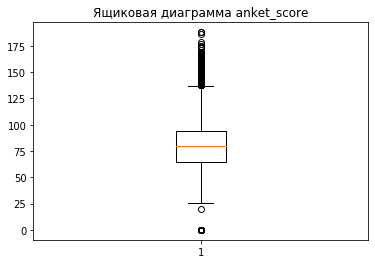

In [111]:
plt.title("Ящиковая диаграмма anket_score")
plt.boxplot(df['anket_score'])
plt.show()



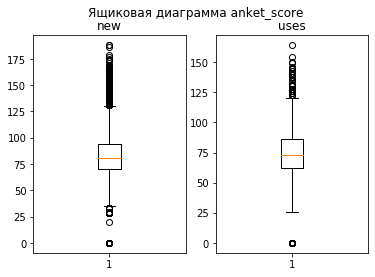

In [112]:
fig, axs = plt.subplots(ncols=2)
fig.suptitle('Ящиковая диаграмма anket_score')
axs[0].boxplot(df_new['anket_score'])
axs[0].set_title('new')
axs[1].boxplot(df_uses['anket_score'])
axs[1].set_title('uses')
plt.show()

# Важность параметров для решения СПР

In [12]:
# Корреляция
print(df.corr()['system'].sort_values(ascending=False)[:10].to_string())

system                                    1.000000
income                                    0.543222
documents_priorApproval                   0.419026
charge                                    0.331448
loan                                      0.291886
documents_count                           0.249147
under                                     0.226033
documents_borrowerProfile                 0.193694
documents_applicationForOnlineServices    0.193694
documents_applicationForAutocredit        0.193694


In [113]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import StratifiedKFold

df: DataFrame = pandas.read_pickle('/mnt/hit4/hit4user/PycharmProjects/mysql_connector/c')
X = df.drop(['system'], 1)
X = X.drop(['under'], 1)
# X = X.drop(['anket_score'], 1)
Y = df['system']

importance_sum = np.zeros(X.shape[1], dtype=np.float)
for i in range(500):
    depth = int((700 - i) / 500 * 9)  # 3.6 - 12.6 # perfect 10
    n_est = int((800 - i) / 500 * 8) # 12-4 # perfect 5
    model = RandomForestClassifier(random_state=i, max_depth=depth, 
                                   n_estimators=n_est, max_leaf_nodes=17, 
                                   min_samples_split=2)
    model.fit(X, Y)
    # TEST
    y_pred = model.predict(X)

    # FEATURE IMPORTANCE
    importances = model.feature_importances_  # feature importance
    importance_sum += importances

indices = np.argsort(importance_sum)[::-1]  # sort indexes

# Print the feature ranking
print("Feature ranking:")
print(importance_sum.shape)

for f in range(X.shape[1])[:180]: # первые 180
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importance_sum[indices[f]] / 100))

Feature ranking:
(210,)
1. income (0.878100)
2. max_income_type_income (0.856400)
3. budget_ratio (0.754630)
4. charge (0.635292)
5. loan (0.570860)
6. max_other_type_loans_month (0.463161)
7. documents_count (0.114985)
8. Проверка ФССП_FAIL (0.083362)
9. Соответствие категории ТС условиям программы кредитования_OK (0.051062)
10. Проверка объема двигателя транспортного средства на допустимое значение_OK (0.050184)
11. documents_consentToProcessingOfPersonalData (0.044253)
12. Проверка ФССП_OK (0.044111)
13. Соответствие региона регистрации / фактического проживания клиента регионам присутствия банка_OK (0.036462)
14. Реестр банкротств_OK (0.025398)
15. anket_score (0.020785)
16. Допустимый возраст клиента_OK (0.018139)
17. Проверка организации-работодателя на наличие в списке ликвидированных_OK (0.016207)
18. Соответствие региона регистрации / фактического проживания клиента регионам присутствия банка_FAIL (0.015983)
19. Проверка, является ли ТС в залоге, по данным ФНП_OK (0.015182)
20

# Важность параметров для решения андерайтора

In [17]:
# Корреляция
print(df.corr()['under'].sort_values(ascending=False)[:10].to_string())

under                                        1.000000
documents_applicationForAdvanceAcceptance    0.831985
documents_financialAssessment                0.831985
documents_individualConditions               0.831985
documents_judgmentOfCreditRisk               0.831985
documents_borrowerProfile                    0.831985
documents_loanOrder                          0.831985
documents_applicationForAutocredit           0.831985
documents_applicationForOnlineServices       0.831985
documents_underwriterConclusion              0.830167


In [114]:
Y = df['under']

importance_sum = np.zeros(X.shape[1], dtype=np.float)
for i in range(500):
    depth = int((870 - 500) / 500 * 9)  # 6 - 15 # perfect 5
    n_est = int((950 - i) / 500 * 32) # 28-60 # perfect 50
    model = RandomForestClassifier(random_state=i, max_depth=depth, 
                                   n_estimators=n_est, max_leaf_nodes=17, 
                                   min_samples_split=2)
    model.fit(X, Y)
    # TEST
    y_pred = model.predict(X)

    # FEATURE IMPORTANCE
    importances = model.feature_importances_  # feature importance
    importance_sum += importances

indices = np.argsort(importance_sum)[::-1]  # sort indexes

# Print the feature ranking
print("Feature ranking:")
print(importance_sum.shape)

for f in range(X.shape[1])[:180]: # первые 180
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importance_sum[indices[f]] / 100))

Feature ranking:
(210,)
1. documents_count (0.929277)
2. documents_consentToProcessingOfPersonalData (0.881848)
3. Проверка объема двигателя транспортного средства на допустимое значение_OK (0.752863)
4. Соответствие категории ТС условиям программы кредитования_OK (0.730341)
5. Проверка, является ли ТС в залоге, по данным ФНП_OK (0.299347)
6. income (0.201271)
7. max_income_type_income (0.146001)
8. issue_year (0.143591)
9. Возраст транспортного средства_OK (0.126562)
10. documents_additionalFile (0.110560)
11. version (0.108124)
12. budget_ratio (0.079782)
13. charge (0.053990)
14. loan (0.052735)
15. max_other_type_loans_month (0.033097)
16. anket_score (0.026336)
17. Проверка объема двигателя транспортного средства на допустимое значение_FAIL (0.021626)
18. term (0.018466)
19. initial_fee_percent (0.015409)
20. sale_point (0.015186)
21. car_cost_requested (0.014292)
22. partner (0.013988)
23. Начилие действующих кредитов у клиента_APP_ERROR (0.013551)
24. payment_monthly (0.013210)


Как можно видеть Анкетный скоринг на 18 месте для СПР и на 33 для решения андерайтора.
documents_xxx - параметры это фалиг наличия документа у сделки или у клиента сделки.
Эти 18 и 33 параметров дают большой задел для улучшения Анкетного скоринга. Для того чтобы выяснить как можно включить эти параметры в анкетный скоринг нужно дополнительное исследование.

# Корреляция между Анкетным скорингом и суммой отрицательных, положительных решений

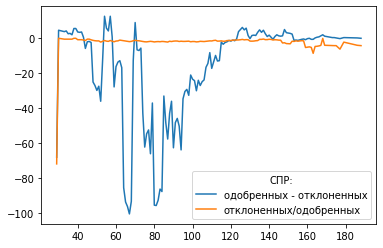

In [115]:
from collections import OrderedDict

df = df[['anket_score', 'system', 'under']]
df = df.fillna(0)

a = df['anket_score'].unique()
sorted_score = sorted(a)

s = OrderedDict()
for x in sorted_score:
    s[x] = 0

p_system = s.copy()
n_system = s.copy()
p_under = s.copy()
n_under = s.copy()

sums_system = {}
sums_under = {}
for i, row in df.iterrows():
    scor = row['anket_score']

    r = 'system'
    if row[r] == 0:
        n_system[scor] += 1
    elif row[r] == 1:
        p_system[scor] += row[r]

    r = 'under'
    if row[r] == 0:
        n_under[scor] += 1
    elif row[r] == 1:
        p_under[scor] += row[r]

# print(p_system)
# print(n_system)
# print(p_under)
# print(n_under)
wind = 5
from operator import sub
#  positive - negative
import numpy as np
system_sums = list(map(sub, list(p_system.values()), list(n_system.values())))
p = [0.1 if x ==0 else x for x in list(p_system.values())]
# system_ratio = np.array(list(n_system.values())) // np.array(list(p_system.values()))
system_ratio = np.array(list(n_system.values())) / np.array(p)
system_sums = pandas.Series(system_sums).rolling(window=wind).mean()
system_ratio = pandas.Series(system_ratio).rolling(window=wind).mean()
plt.plot(sorted_score, system_sums, label='одобренных - отклоненных')
plt.plot(sorted_score, - (system_ratio), label='отклоненных/одобренных')
plt.legend(title='СПР:')
plt.show()

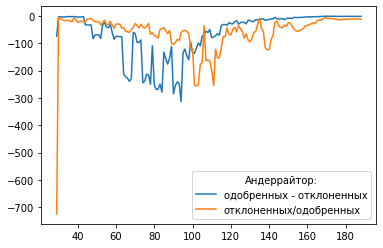

In [116]:
under_sums = list(map(sub, list(p_under.values()), list(n_under.values())))
p = [0.1 if x ==0 else x for x in list(p_under.values())]
# under_ratio = np.array(list(n_under.values())) // np.array(list(p_under.values()))
under_ratio = np.array(list(n_under.values())) / p
under_sums = pandas.Series(under_sums).rolling(window=wind).mean()
under_ratio = pandas.Series(under_ratio).rolling(window=wind).mean()
plt.plot(sorted_score, under_sums, label='одобренных - отклоненных')
plt.plot(sorted_score, - (under_ratio), label='отклоненных/одобренных')
plt.legend(title='Андеррайтор:')
plt.show()

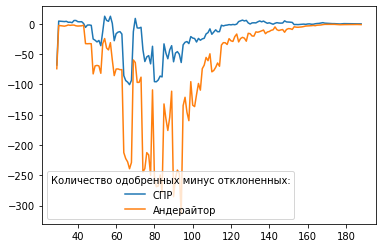

In [117]:
plt.plot(sorted_score, system_sums, label='СПР')
plt.plot(sorted_score, under_sums, label='Андерайтор')
plt.legend(title='Количество одобренных минус отклоненных:')
plt.show()

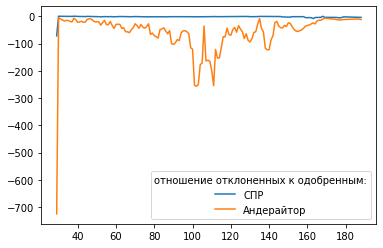

In [118]:
plt.plot(sorted_score, - system_ratio, label='СПР')
plt.plot(sorted_score, - under_ratio, label='Андерайтор')
plt.legend(title='отношение отклоненных к одобренным:')
plt.show()